In [2]:
import pandas as pd
%pip install openpyxl

df = pd.read_excel('/Users/sukanya/Documents/Ooogles/Resources/A&A rebuild.xlsx')

/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_7759/2611165644.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Note: you may need to restart the kernel to use updated packages.


# A&A Summary Sheet

In [3]:
import pandas as pd

# Read all sheets from the Excel file
all_sheets = pd.read_excel('/Users/sukanya/Documents/Ooogles/Resources/A&A rebuild.xlsx', sheet_name=None)

for sheet_name, df in all_sheets.items():
    print(f"Sheet Name: {sheet_name}\n")
    
    if df.empty:
        print("Empty DataFrame\n")
    else:
        print(df.head())
        print("\n" + "-"*50 + "\n")



Sheet Name: A&A Summary

            Unnamed: 0             Unnamed: 1  Unnamed: 2  \
0                  NaN                    NaN         NaN   
1           Row Labels  Sum of Purchase Price  Sum of NBV   
2               active              539244.02   447993.53   
3  No Agmnt - In Stock                78596.1    62888.21   
4              pending                3248.62     3158.38   

                            Unnamed: 3          Unnamed: 4        Unnamed: 5  
0                                  NaN                 NaN               NaN  
1  Sum of Headline value (avg from BM)  Sum of Adjusted MV  Sum of Arrears £  
2                            558820.03        455043.92093           3808.16  
3                              82827.2           70514.877                 0  
4                              2226.51            2003.859                 0  

--------------------------------------------------

Sheet Name: A&A Report

        Unnamed: 0 Xero Assets Moved - Lookup to Xero    

In [4]:
df = all_sheets['A&A Summary']
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Row Labels,Sum of Purchase Price,Sum of NBV,Sum of Headline value (avg from BM),Sum of Adjusted MV,Sum of Arrears £
2,active,539244.02,447993.53,558820.03,455043.92093,3808.16
3,No Agmnt - In Stock,78596.1,62888.21,82827.2,70514.877,0
4,pending,3248.62,3158.38,2226.51,2003.859,0
5,Purchased NRF,1747.95,0,1595,1399.43,0
6,recovery,15055.86,11157.89,15827.32,4358.8,855.4
7,terminated,21863.95,15462.22,24799.97,20643.45,263.96
8,Grand Total,659756.5,540660.23,686096.03,553964.33693,4927.52
9,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      object
 1   Unnamed: 1  8 non-null      object
 2   Unnamed: 2  8 non-null      object
 3   Unnamed: 3  8 non-null      object
 4   Unnamed: 4  10 non-null     object
 5   Unnamed: 5  8 non-null      object
dtypes: object(6)
memory usage: 756.0+ bytes


In [6]:
# Renaming coloumns since they're unamed

new_column_names = {
    df.columns[0]: 'Row Labels',
    df.columns[1]: 'Sum of Purchase Price',
    df.columns[2]: 'Sum of NBV',
    df.columns[3]: 'Sum of Headline value (avg from BM)',
    df.columns[4]: 'Sum of Adjusted MV',
    df.columns[5]: 'Sum of Arrears £'
}

# Renaming the columns
df.rename(columns=new_column_names, inplace=True)

# Dropping the first 2 rows
df.drop(index=[0, 1], inplace=True)
df.reset_index(drop=True, inplace=True)

df

,Row Labels,Sum of Purchase Price,Sum of NBV,Sum of Headline value (avg from BM),Sum of Adjusted MV,Sum of Arrears £
0,active,539244.02,447993.53,558820.03,455043.92093,3808.16
1,No Agmnt - In Stock,78596.1,62888.21,82827.2,70514.877,0
2,pending,3248.62,3158.38,2226.51,2003.859,0
3,Purchased NRF,1747.95,0,1595,1399.43,0
4,recovery,15055.86,11157.89,15827.32,4358.8,855.4
5,terminated,21863.95,15462.22,24799.97,20643.45,263.96
6,Grand Total,659756.5,540660.23,686096.03,553964.33693,4927.52
7,NaN,NaN,NaN,NaN,NaN,NaN
8,For LTV,NaN,NaN,NaN,552564.90693,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

Sum of Purchase Price                  4
Sum of NBV                             4
Sum of Headline value (avg from BM)    4
Sum of Arrears £                       4
Row Labels                             3
Sum of Adjusted MV                     2
dtype: int64

# Column names and their description

## Row Labels
- This column likely contains labels or categories that describe the status or type of the assets or data.
-  These labels help categorize the assets or data into different groups based on their status or other criteria.

## Sum of Purchase Price
- This column represents the total purchase price of the assets. It indicates the total amount paid to acquire these assets initially. F

## Sum of NBV (Net Book Value)
- NBV represents the net value of the assets on the company's books. 
- This column would show the net value of the tech assets after accounting for depreciation.

## Sum of Headline value (avg from BM)
- This column represents the average headline value of the assets based on the Business Model (BM).

# Sum of Adjusted MV (Adjusted Market Value)
- This column shows the Adjusted Market Value of the assets, which takes into account various adjustments like depreciation, market conditions, etc. 
- Adjusted MV provides a more realistic and current value of the assets compared to the original purchase price or headline value.

## Sum of Arrears £
- Arrears represent the amount of money that is overdue or unpaid.
- This is the total amount of unpaid rental fees or other charges.

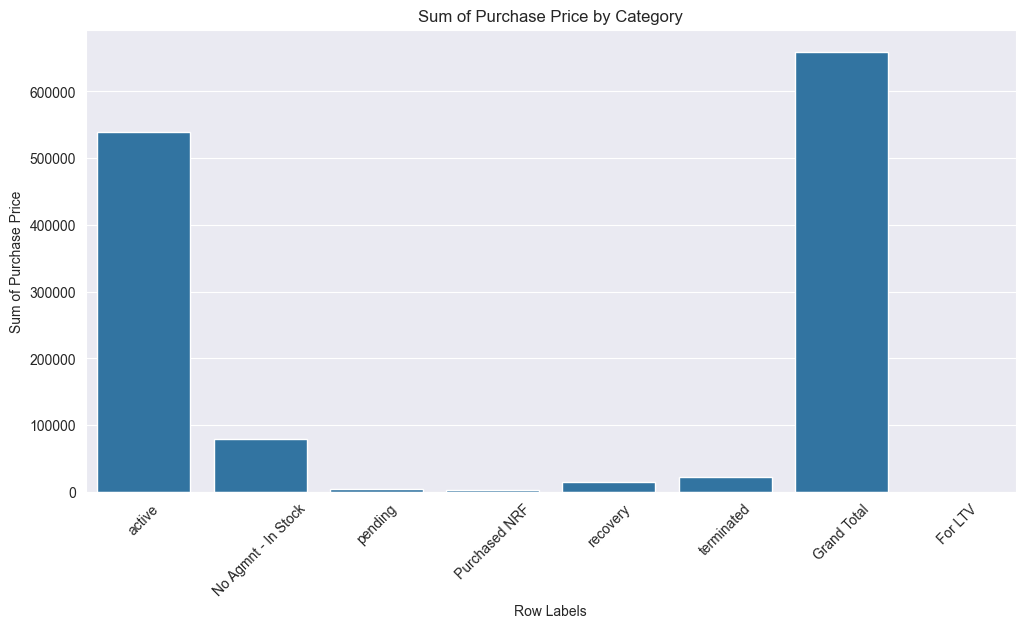

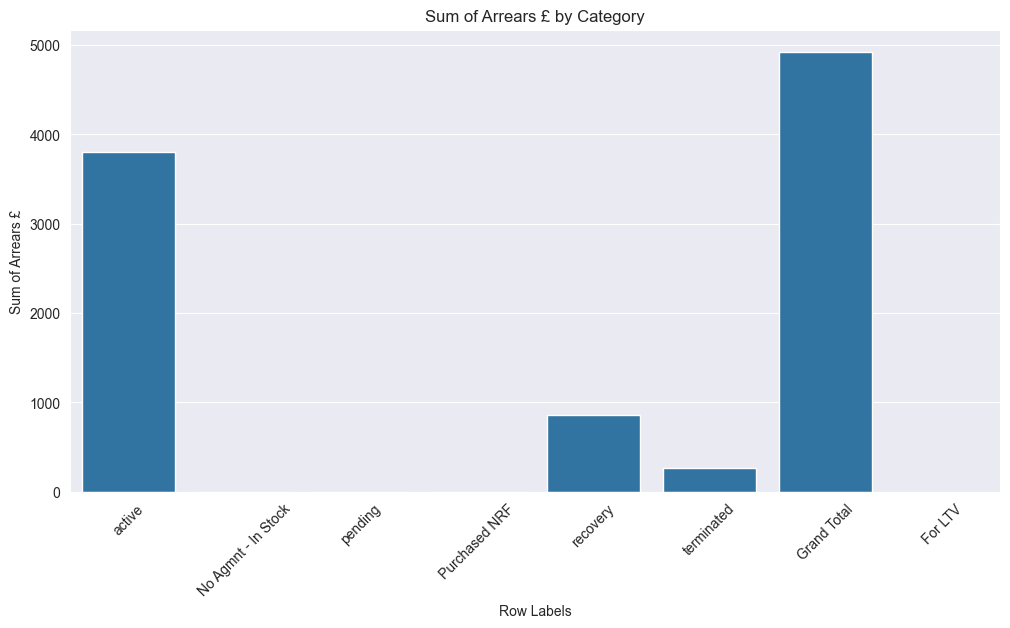

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Plot for 'Sum of Purchase Price'
plt.figure(figsize=(12, 6))
sns.barplot(x='Row Labels', y='Sum of Purchase Price', data=df)
plt.title('Sum of Purchase Price by Category')
plt.xticks(rotation=45)
plt.show()

# Plot for 'Sum of Arrears £'
plt.figure(figsize=(12, 6))
sns.barplot(x='Row Labels', y='Sum of Arrears £', data=df)
plt.title('Sum of Arrears £ by Category')
plt.xticks(rotation=45)
plt.show()



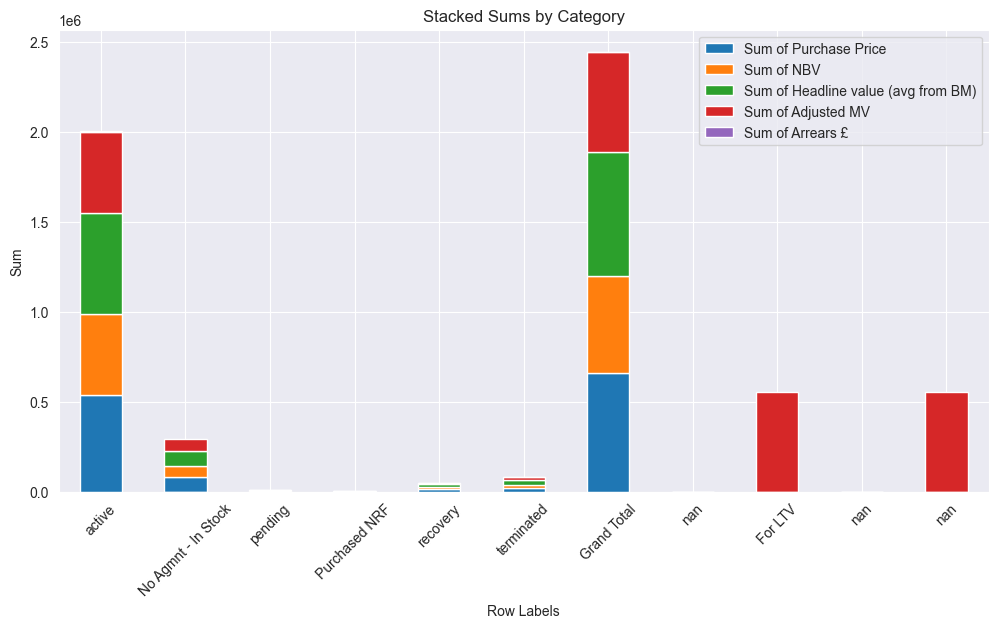

In [9]:
# Select relevant columns
stacked_df = df[['Row Labels', 'Sum of Purchase Price', 'Sum of NBV', 'Sum of Headline value (avg from BM)', 'Sum of Adjusted MV', 'Sum of Arrears £']]

# Set 'Row Labels' as index
stacked_df.set_index('Row Labels', inplace=True)

# Plot
stacked_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Sums by Category')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.show()

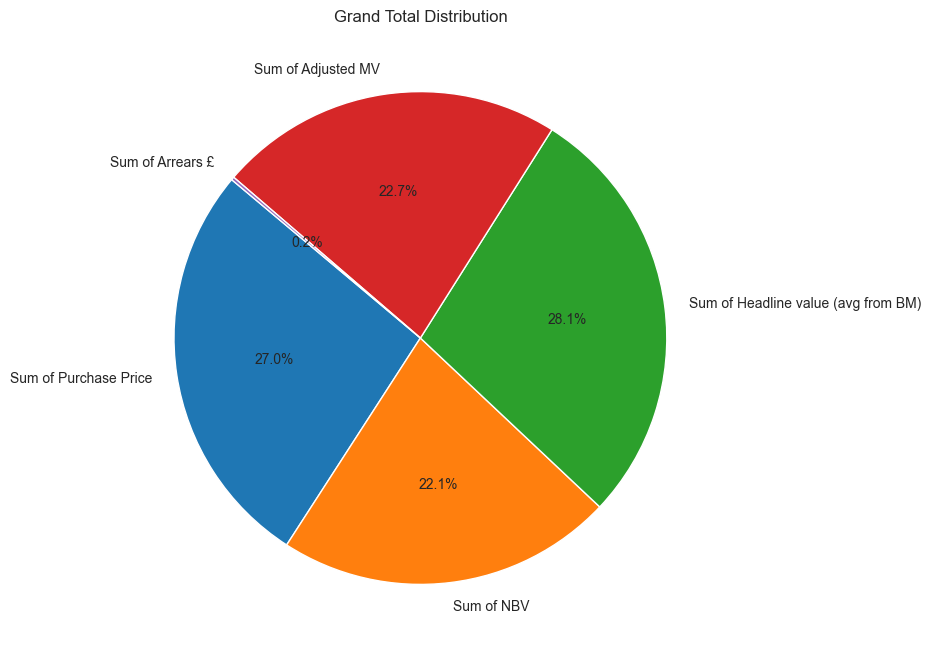

In [10]:
# Filter 'Grand Total' row
grand_total = df[df['Row Labels'] == 'Grand Total']

# Plot
labels = grand_total.columns[1:]
sizes = grand_total.iloc[0, 1:]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Grand Total Distribution')
plt.show()

# A&A Report Sheet

In [11]:
df2 = all_sheets['A&A Report']
df2

,Unnamed: 0,Xero Assets,Moved - Lookup to Xero,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,6,7,8,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,553964.33693,Unnamed: 39,2024-04-01 00:00:00,4927.52,Unnamed: 42,Unnamed: 43
0,Asset Ownership,Asset ID,Asset Status,Master Category,View to end customer (Collection name),Shopify Category 1 (Product Category),Shopify Category 2 (Product Type),Xero Category,Xero Ledger Code,Database Category,...,NBV,Headline value (avg from BM),BM DATE DOWNLOAD,Backmarket Link,Adjusted MV,Commission,Arrear Days,Arrears £,Arrears in Categories,Adjustment Factor
1,OFI,2054,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,893,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-p...,680.52,0.1,0,0,NaN,1
2,OFI,2078,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,489,2024-01-31 00:00:00,https://www.backmarket.co.uk/en-gb/p/hp-250-g8...,293.35,0.1,0,0,NaN,1
3,OFI,2079,Disposed,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,0,152.97,-,https://www.ebay.co.uk/itm/295096145227?epid=6...,103.3,0.1,0,0,NaN,1
4,OFI,2206,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,901.51,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,781.27,0.1,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,OFI,2823,Active,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,306.25,353.97,-,https://www.ebay.co.uk/itm/134948212914?var=0&...,315,0.1,0,0,NaN,1
763,OFI,2824,Active,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,306.25,353.97,-,https://www.ebay.co.uk/itm/134948212914?var=0&...,315,0.1,0,0,NaN,1
764,OFI,2825,Active,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,941.93,1120,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,968.84,0.1,0,0,NaN,1
765,OFI,2826,Active,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,1076.5,901.51,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,811.359,0.1,0,0,NaN,1


In [12]:
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])
df2.reset_index(drop=True, inplace=True)

df2

,Asset Ownership,Asset ID,Asset Status,Master Category,View to end customer (Collection name),Shopify Category 1 (Product Category),Shopify Category 2 (Product Type),Xero Category,Xero Ledger Code,Database Category,...,NBV,Headline value (avg from BM),BM DATE DOWNLOAD,Backmarket Link,Adjusted MV,Commission,Arrear Days,Arrears £,Arrears in Categories,Adjustment Factor
0,OFI,2054,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,893,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-p...,680.52,0.1,0,0,NaN,1
1,OFI,2078,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,489,2024-01-31 00:00:00,https://www.backmarket.co.uk/en-gb/p/hp-250-g8...,293.35,0.1,0,0,NaN,1
2,OFI,2079,Disposed,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,0,152.97,-,https://www.ebay.co.uk/itm/295096145227?epid=6...,103.3,0.1,0,0,NaN,1
3,OFI,2206,Disposed,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,0,901.51,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,781.27,0.1,0,0,NaN,1
4,OFI,2335,Disposed,Consumer Electronics,NaN,NaN,NaN,Audio,400217,Audio,...,0,270,-,https://www.ebay.co.uk/itm/386906415641?chn=ps...,206.93,0.1,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,OFI,2823,Active,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,306.25,353.97,-,https://www.ebay.co.uk/itm/134948212914?var=0&...,315,0.1,0,0,NaN,1
762,OFI,2824,Active,Consumer Electronics,NaN,NaN,NaN,Televisions,400108,Televisions,...,306.25,353.97,-,https://www.ebay.co.uk/itm/134948212914?var=0&...,315,0.1,0,0,NaN,1
763,OFI,2825,Active,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,941.93,1120,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,968.84,0.1,0,0,NaN,1
764,OFI,2826,Active,Consumer Electronics,NaN,NaN,NaN,Computing,400218,Computing,...,1076.5,901.51,2024-04-01 00:00:00,https://www.backmarket.co.uk/en-gb/p/macbook-a...,811.359,0.1,0,0,NaN,1


In [18]:
with open('column_names.txt', 'w') as f:
    for column in df2.columns:
        f.write(f"{column}\n")


# Columns:

Asset Ownership

Asset ID

Asset Status

Master Category

View to end customer (Collection name)

Shopify Category 1 (Product Category)

Shopify Category 2 (Product Type)

Xero Category

Xero Ledger Code

Database Category

Brand Name

Product

Model

Series

Screen Size

Storage

Release Year

Condition

Product Name

Agreement Number

Customer Code

Customer Name

Status of Agreement

Start Date

Term of Agreement ( Months)

Agreement End Date

Remaining Agreement (Months)

Monthly Rental Excl VAT

Total Contract Value

Last Payment Amount


Last Payment Date

Purchase Price

Asset Purchase Date

### RRP (Recommended Retail Price):

This is the suggested price at which the product should be sold to the end customer. It's the price set by the manufacturer or distributor as the price consumers can expect to pay.

### NBV (Net Book Value):

NBV represents the current value of an asset on the company's balance sheet after accounting for depreciation or amortization. In the context of tech rentals, it would indicate the remaining value of the rented tech assets after accounting for any depreciation or wear and tear.

### Headline Value (avg from BM):

This likely refers to the average value of the tech assets as determined by Backmarket (BM). Backmarket is a platform where refurbished electronics are sold. The "Headline Value" could be an average market value of similar products listed on Backmarket.

BM DATE DOWNLOAD

Backmarket Link

Adjusted MV

Commission

Arrear Days

Arrears £

Arrears in Categories

Adjustment Factor


<Figure size 1500x600 with 0 Axes>

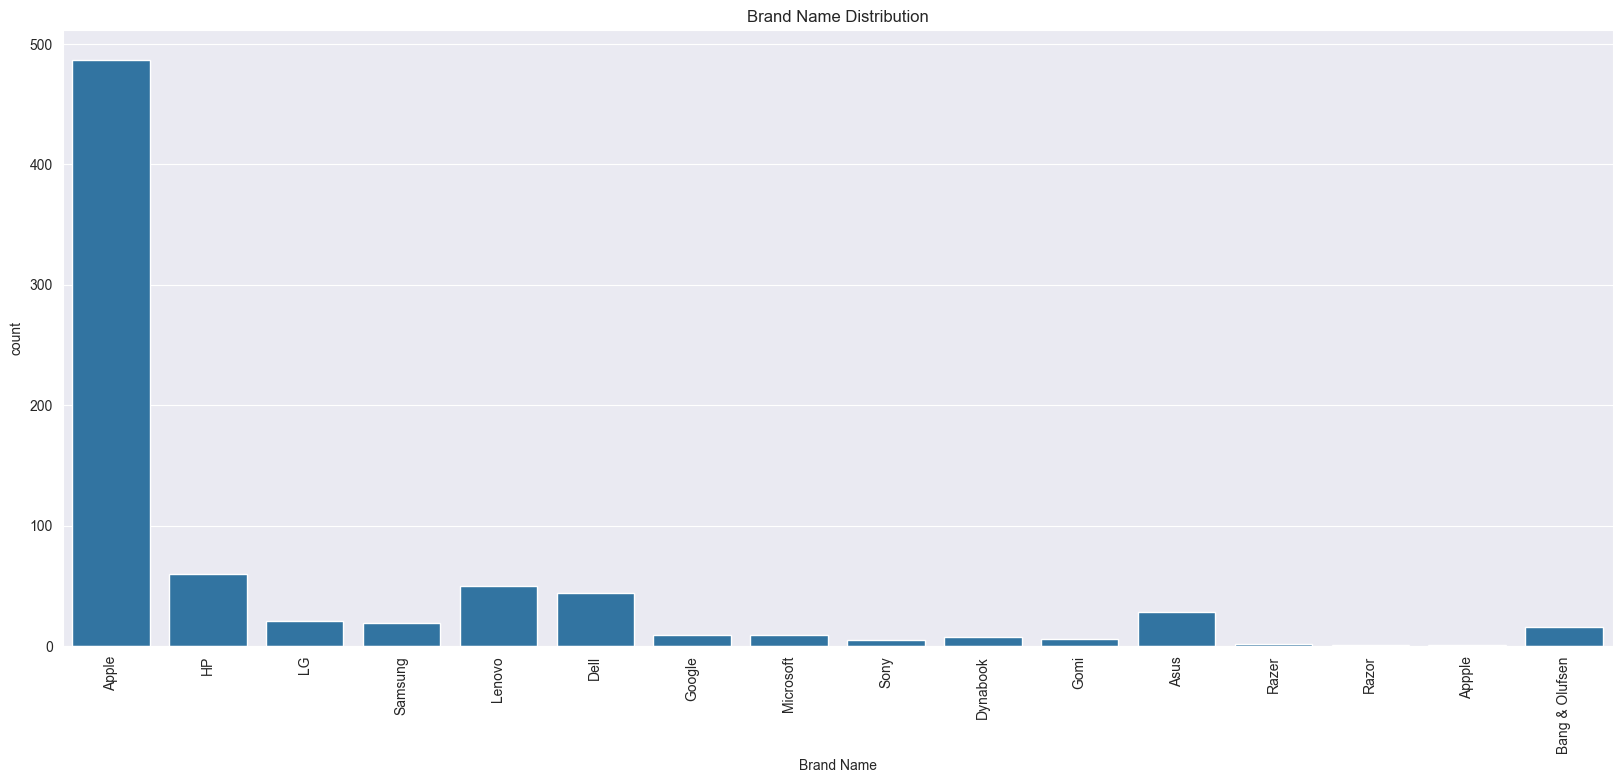

In [29]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Bar plot for Brand Name
plt.figure(figsize=(20, 8))
sns.countplot(data=df2, x='Brand Name')
plt.xticks(rotation=90)
plt.title('Brand Name Distribution')
plt.show()

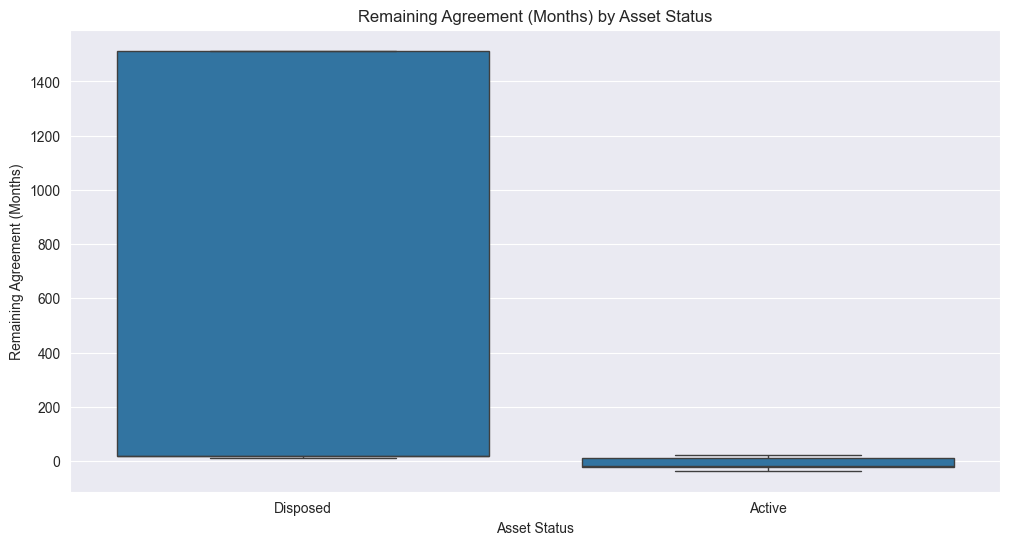

In [30]:
# Boxplot for Asset Status vs Remaining Agreement (Months)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Asset Status', y='Remaining Agreement (Months)')
plt.title('Remaining Agreement (Months) by Asset Status')
plt.show()

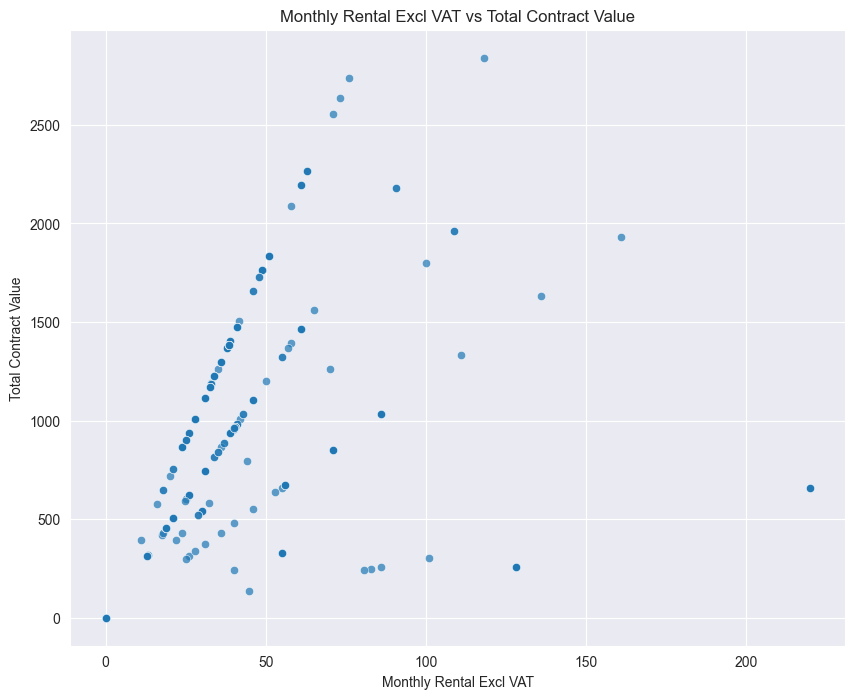

In [24]:
# Scatter plot for Monthly Rental Excl VAT vs Total Contract Value
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df2, x='Monthly Rental Excl VAT', y='Total Contract Value', alpha=0.7)
plt.title('Monthly Rental Excl VAT vs Total Contract Value')
plt.xlabel('Monthly Rental Excl VAT')
plt.ylabel('Total Contract Value')
plt.show()

/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_7759/2449692456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x='Asset Status', y='Monthly Rental Excl VAT', palette='muted')


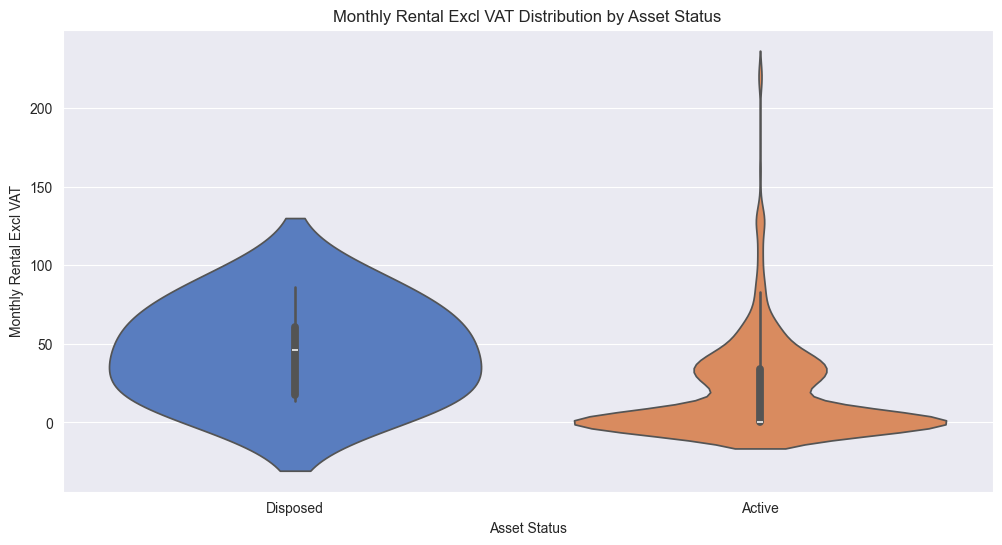

In [37]:
# Distribution of Monthly Rental Excl VAT for different Asset Status
plt.figure(figsize=(12, 6))
sns.violinplot(data=df2, x='Asset Status', y='Monthly Rental Excl VAT', palette='muted')
plt.title('Monthly Rental Excl VAT Distribution by Asset Status')
plt.show()

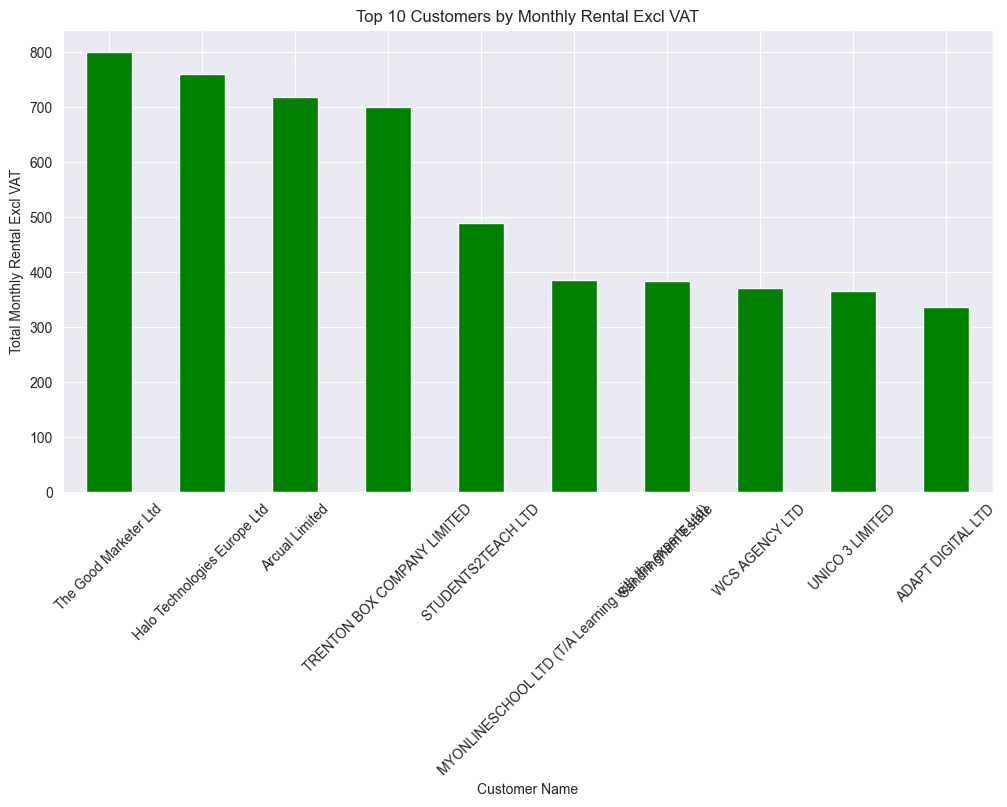

In [42]:
# Top customers by Monthly Rental Excl VAT
top_customers = df2.groupby('Customer Name')['Monthly Rental Excl VAT'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Monthly Rental Excl VAT')
plt.xlabel('Customer Name')
plt.ylabel('Total Monthly Rental Excl VAT')
plt.xticks(rotation=45)
plt.show()
